# Step 0: Insert libraries and Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("/kaggle/input/property-prices-of-bangloreindia/bhp.csv")

In [3]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Step 1: Remove outliers in price_per_sqft, using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [4]:
df.shape

(13200, 7)

In [5]:
min_percentile = df['price_per_sqft'].quantile(0.001)
max_percentile = df['price_per_sqft'].quantile(0.999)

In [6]:
min_percentile, max_percentile

(1366.184, 50959.36200000098)

In [9]:
df2 = df[(df['price_per_sqft'] < max_percentile) & (df['price_per_sqft'] > min_percentile)]

In [24]:
df2.shape

(13172, 7)

In [23]:
df.shape[0] - df2.shape[0]

28

**So we found 13200 - 13172 = 28 outliers!**

# Step 2: After removing outliers in step 1, we get a new dataframe.

In [13]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Step 3: On step(2) dataframe, use 4 standard deviation to remove outliers

In [15]:
df2['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [17]:
df2['price_per_sqft'].mean()

6663.6537351958705

In [18]:
df2['price_per_sqft'].std()

4141.020700174613

In [19]:
max_threshold = df2['price_per_sqft'].mean() + 4 * df2['price_per_sqft'].std()
min_threshold = df2['price_per_sqft'].mean() - 4 * df2['price_per_sqft'].std()

In [20]:
max_threshold, min_threshold

(23227.73653589432, -9900.429065502582)

In [21]:
df3 = df2[(df2['price_per_sqft'] > min_threshold) & (df2['price_per_sqft'] < max_threshold)]

In [22]:
df3.shape

(13047, 7)

In [25]:
df2.shape[0] - df3.shape[0]

125

**So we found 13172 - 13047 = 125 outliers!**

# Step 4: Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

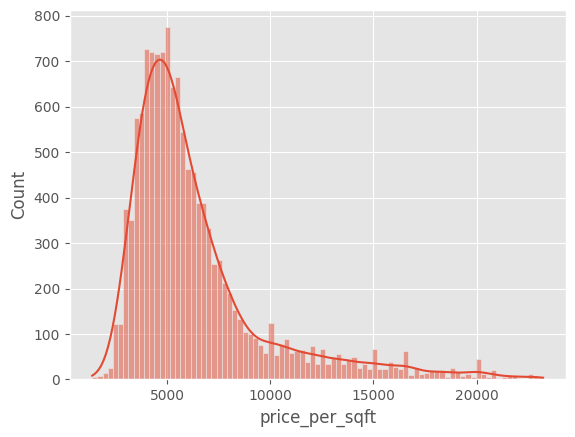

In [29]:
sn.histplot(df3['price_per_sqft'], kde=True)
plt.show()

# Step 5: On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and we will get exact same result

In [30]:
df2['zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()

/tmp/ipykernel_71/2954372211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()


In [31]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [32]:
df4 = df2[(df2['zscore'] > -4) & (df2['zscore'] < 4)]

In [33]:
df4.shape

(13047, 8)

In [34]:
df2.shape[0] - df4.shape[0]

125

**So we found again 125 outliers, just like when we used 4 stds cleaning method!**